<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [50]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import xgboost as XGB
from sklearn.ensemble import GradientBoostingClassifier as xgb

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5,1,'Estimators vs score at depth of 5')

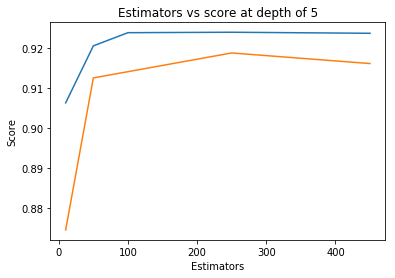

In [0]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


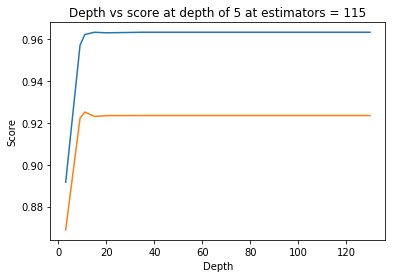

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


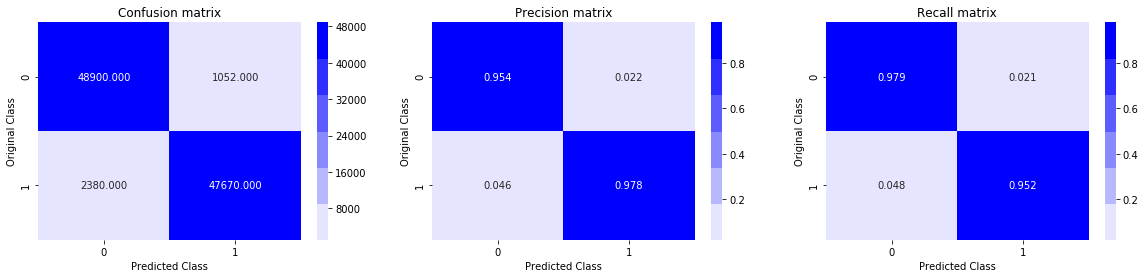

Test confusion_matrix


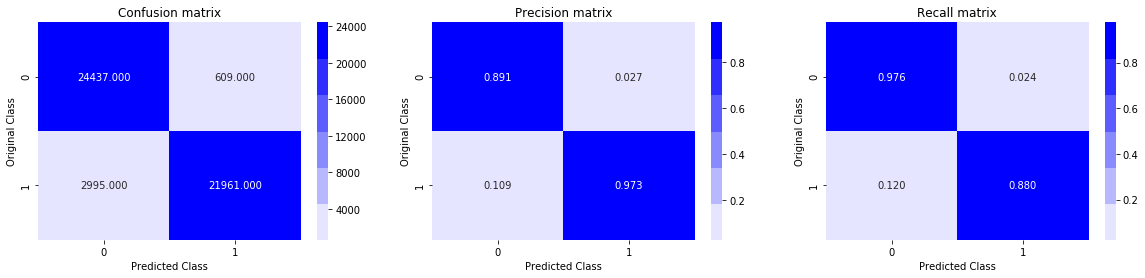

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

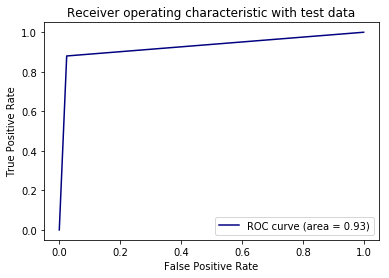

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

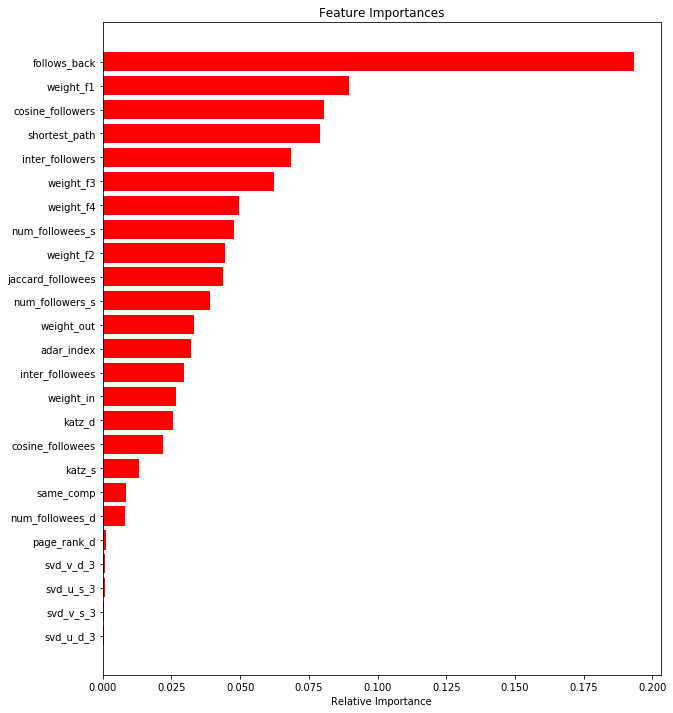

In [0]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 6 Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

## 6.1 Preferential Attachment 

Preferential Attachment One well-known concept in social networks is that users with many friends tend to create more connections in the future. This is due to the fact that in some social networks, like in finance, the rich get richer. We estimate how ”rich” our two vertices are by calculating the multiplication between the number of friends (|Γ(x)|) or followers each vertex has. It may be noted that the similarity index does not require any node neighbor information; therefore, this similarity index has the lowest computational complexity.

In [22]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [23]:
if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [9]:
in_deg = dict(train_graph.in_degree())
out_deg = dict(train_graph.out_degree())

In [16]:
def Preferential (x,y,typee):
    try:
        return typee.get(x)*typee.get(y)
    except:
        return 0

In [51]:
if not os.path.isfile('data/fea_sample/storage_sample_stage5.h5'):
    #mapping Preferential followers to train and test data
    df_final_train['Preferential_Follower'] = df_final_train.apply(lambda row:
                                            Preferential(row['source_node'],row['destination_node'],out_deg),axis=1)
    df_final_test['Preferential_Follower'] = df_final_test.apply(lambda row:
                                            Preferential(row['source_node'],row['destination_node'],out_deg),axis=1)

    #mapping Preferential followees to train and test data
    df_final_train['Preferential_Followees'] = df_final_train.apply(lambda row:
                                            Preferential(row['source_node'],row['destination_node'],in_deg),axis=1)
    df_final_test['Preferential_Followees'] = df_final_test.apply(lambda row:
                                            Preferential(row['source_node'],row['destination_node'],in_deg),axis=1)
    
    hdf = HDFStore('data/fea_sample/storage_sample_stage5.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
    
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')

## 6.2 svd_dot

__we will create these each of these features for both train and test data points__
<ol>
<li>SVD_dot is scalar ,Dot product between sourse node svd and destination node svd features </li>
</ol>

In [52]:
def svd_dot(source_node, destination_node,U_v):
    try:
        sou = sadj_dict[source_node]
        des = sadj_dict[destination_node]
        return np.dot((U_v[sou]),(U_v[des]))
    except:
        return 0

In [53]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [54]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [55]:
U, s, V = svds(Adj, k = 20)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 20)
V Shape (20, 1780722)
s Shape (20,)


In [56]:
if not os.path.isfile('data/fea_sample/storage_sample_stage6.h5'):
    
    #SVD_dot for U
    df_final_train['svd_dot_U'] = df_final_train.apply(lambda row: svd_dot(row['source_node'],row['destination_node'],U),axis=1)
    df_final_test['svd_dot_U'] = df_final_test.apply(lambda row: svd_dot(row['source_node'],row['destination_node'],U),axis=1)
    
    #SVD_dot for V
    df_final_train['svd_dot_V'] = df_final_train.apply(lambda row: svd_dot(row['source_node'],row['destination_node'],V.T),axis=1)
    df_final_test['svd_dot_V'] = df_final_test.apply(lambda row: svd_dot(row['source_node'],row['destination_node'],V.T),axis=1)


    hdf = HDFStore('data/fea_sample/storage_sample_stage6.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
    
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage6.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage6.h5', 'test_df',mode='r')

In [58]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'Preferential_Follower', 'Preferential_Followees', 'svd_dot_U',
       'svd_dot_V'],
      dtype='

In [60]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [61]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

## Random Forest Hyper paramater tuning with Grid search

Estimators =  10 Train Score 0.8893530853671534 test Score 0.8599807473527611
Estimators =  50 Train Score 0.920610351715699 test Score 0.9049500743573401
Estimators =  100 Train Score 0.9210259413000972 test Score 0.9050654428012919
Estimators =  250 Train Score 0.9213939089692101 test Score 0.9132911392405062
Estimators =  450 Train Score 0.9212848718055963 test Score 0.9127986672009109


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

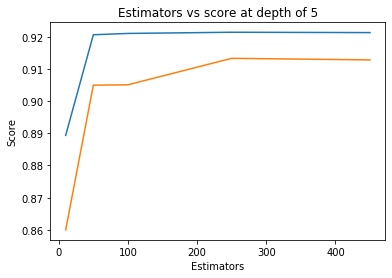

In [62]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8818058556840811 test Score 0.8611386886519619
depth =  9 Train Score 0.9585860442320652 test Score 0.9235325224748809
depth =  11 Train Score 0.9609512834371845 test Score 0.9244277070198451
depth =  15 Train Score 0.9630429908066127 test Score 0.9222184503097685
depth =  20 Train Score 0.963101135506493 test Score 0.9252221752010156
depth =  35 Train Score 0.9631350965703511 test Score 0.9252184214423219
depth =  50 Train Score 0.9631350965703511 test Score 0.9252184214423219
depth =  70 Train Score 0.9631350965703511 test Score 0.9252184214423219
depth =  130 Train Score 0.9631350965703511 test Score 0.9252184214423219


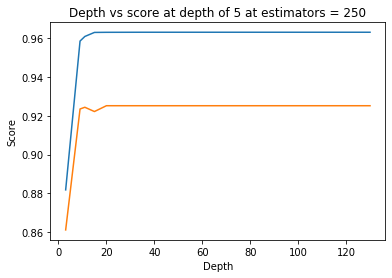

In [63]:
#From the above search we can see that 250 estimator gave best F1 score ,so now we fix estimator and we do search on depth
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 250')
plt.show()

From above two search we found n_estimators =250 and max_depth =20 gives best F1 score.so lets train and fit the model for best paramaters.

In [78]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,random_state=25,verbose=0,warm_start=False)

clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [79]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.963101135506493
Test f1 score 0.9252221752010156


Train confusion_matrix


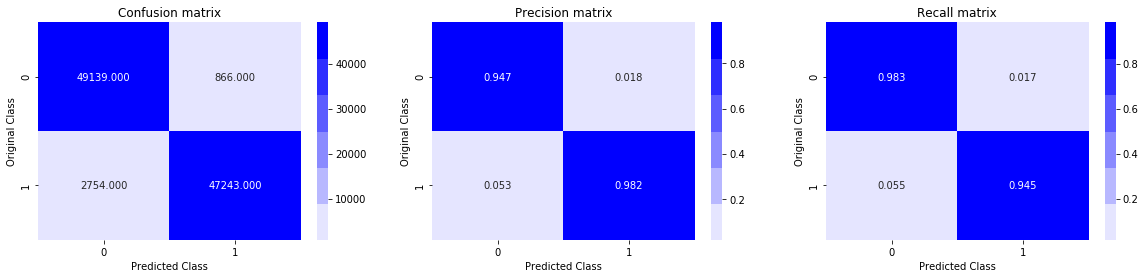

Test confusion_matrix


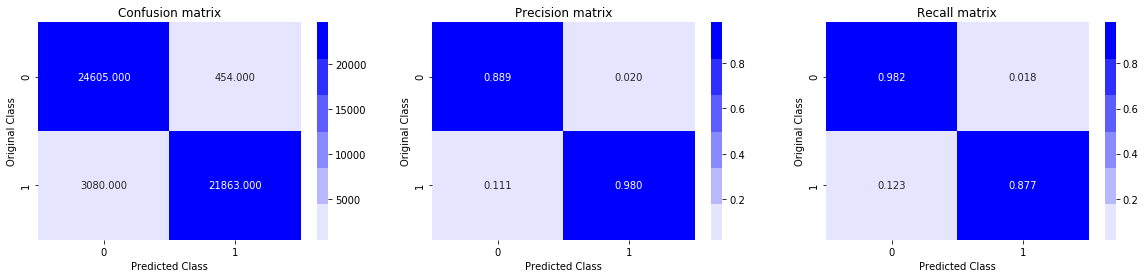

In [80]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

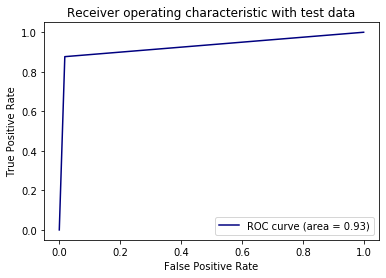

In [81]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

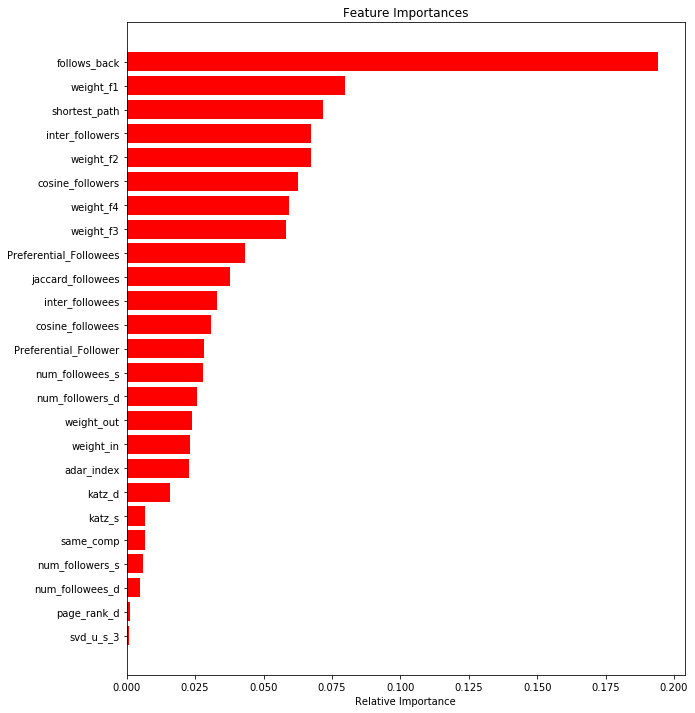

In [82]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest Hyper paramater tuning with Random Search

In [69]:
# from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)

print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96167238 0.96171919 0.95989748 0.96113196 0.96297115]
mean train scores [0.96286193 0.96257126 0.96041976 0.96213998 0.9642601 ]


In [70]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [71]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [72]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [73]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9644346133066942
Test f1 score 0.926123381568926


In [74]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


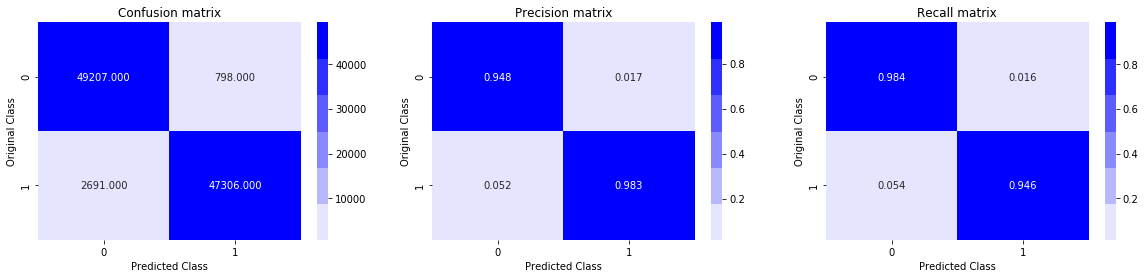

Test confusion_matrix


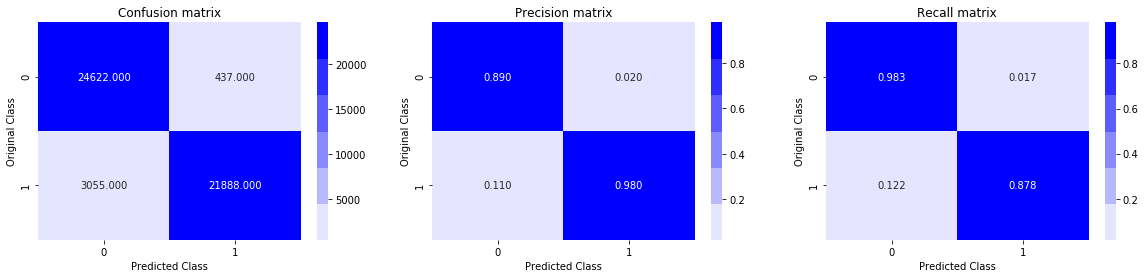

In [75]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

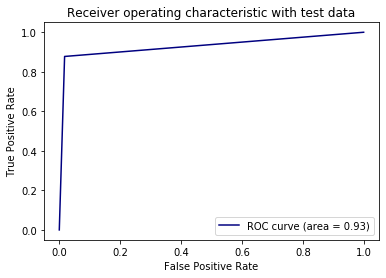

In [76]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

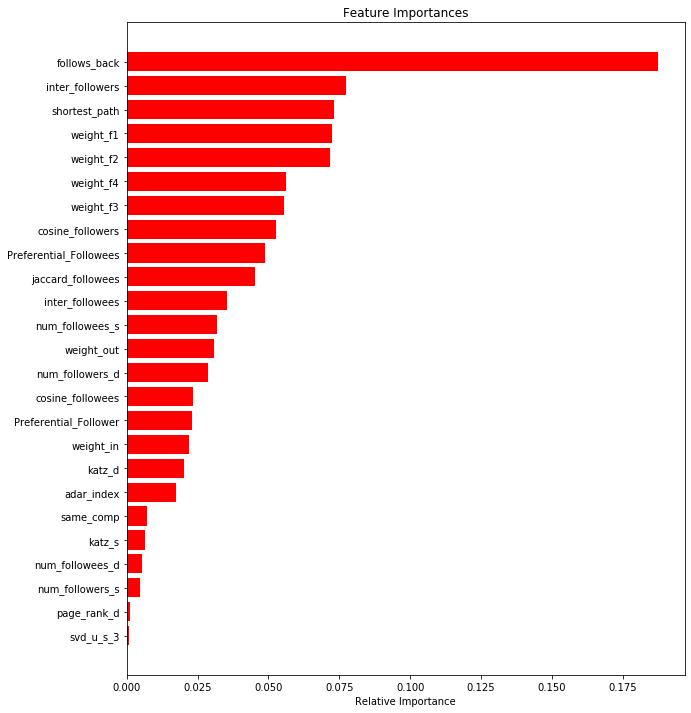

In [77]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## XGBOOST

In [85]:
clf = xgb()

params = {'n_estimators' : [5,10,50,100,150], 'max_depth' : [2,3,4], 'learning_rate' : [0.001,0.1,1]}

Model = GridSearchCV(clf,param_grid = params,scoring= 'f1',n_jobs=-1,cv=4,return_train_score = True)

Model.fit(df_final_train,y_train)

print('mean test scores',Model.cv_results_['mean_test_score'])
print('mean train scores',Model.cv_results_['mean_train_score'])

mean test scores [0.86444226 0.86444226 0.86444226 0.86444226 0.87723519 0.8965706
 0.8965706  0.8965706  0.89657326 0.89657326 0.92200787 0.92200787
 0.92250365 0.9231124  0.92335766 0.91537903 0.91183849 0.95481029
 0.96842643 0.97169642 0.91530117 0.92734709 0.96773776 0.97192991
 0.97286912 0.92427023 0.92643307 0.97073171 0.97263055 0.97333795
 0.9421192  0.96630176 0.97257677 0.97337021 0.97295213 0.96179404
 0.97020613 0.97292236 0.97231895 0.9721484  0.96826901 0.97063136
 0.97163468 0.97113612 0.97093229]
mean train scores [0.86444306 0.86444306 0.86444306 0.86444306 0.87806431 0.89738163
 0.89738163 0.89738163 0.89750771 0.89750771 0.92217557 0.92217557
 0.92249971 0.92312091 0.92345797 0.91539515 0.91266795 0.9546145
 0.96926852 0.97198024 0.9154943  0.92751514 0.96820088 0.97247113
 0.97345153 0.92424002 0.92720587 0.97110154 0.97351016 0.97476482
 0.94219959 0.96719533 0.97361265 0.97545654 0.97620426 0.96239321
 0.97111223 0.97570788 0.97780243 0.97910995 0.96854437 0.971

In [86]:
Model.cv_results_

{'mean_fit_time': array([  3.72581393,   5.75609261,  22.10905939,  43.53356367,
         69.73471051,   4.46627164,   7.68716908,  32.26026541,
         63.28672022,  93.33737612,   5.38112766,   9.1903165 ,
         41.35298169,  81.95103025, 122.73716426,   3.95331079,
          6.49657393,  27.12240064,  51.66710764,  77.15004009,
          4.76655579,   9.34588796,  45.46109974,  87.02918404,
        132.16040802,   5.40421712,  12.0274455 ,  68.86900574,
        138.05638462, 207.74148029,   4.10126168,   6.5312078 ,
         28.12136096,  55.5755772 ,  81.5450834 ,   6.07952183,
         10.88994581,  46.86561817,  91.37436593, 134.93925649,
          8.28257489,  15.23142278,  73.07096243, 135.00449592,
        154.58921844]),
 'std_fit_time': array([ 0.14678143,  0.44335383,  0.72401822,  1.32564058,  1.09318182,
         0.09684006,  0.37702413,  1.40274338,  3.29806659,  4.27944872,
         0.21865527,  0.3735669 ,  1.25426176,  3.44809421,  3.78063262,
         0.16747469,

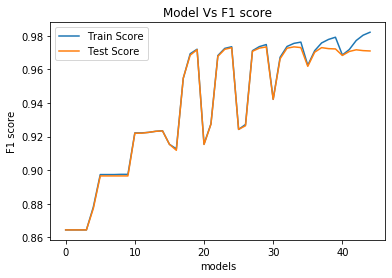

In [87]:
plt.plot(Model.cv_results_['mean_train_score'],label='Train Score')
plt.plot(Model.cv_results_['mean_test_score'],label='Test Score')
plt.xlabel("models")
plt.ylabel('F1 score')
plt.title('Model Vs F1 score')
plt.legend()

In [88]:
Model.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=2, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
best_model = xgb(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=2, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
best_model.fit(df_final_train,y_train)
y_train_pred = best_model.predict(df_final_train)
y_test_pred = best_model.predict(df_final_test)

In [91]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9752161383285303
Test f1 score 0.8765930991607086


In [92]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


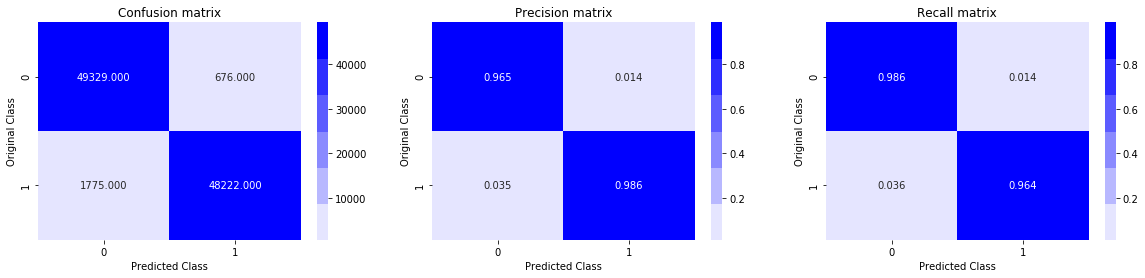

Test confusion_matrix


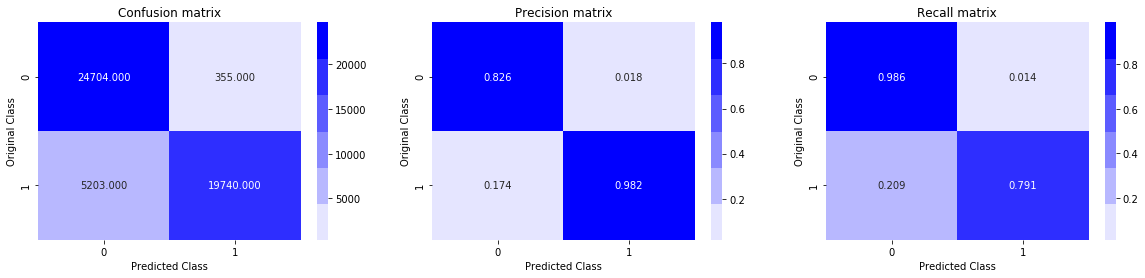

In [93]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

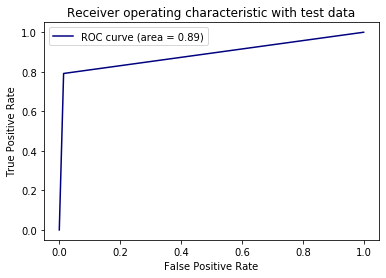

In [94]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

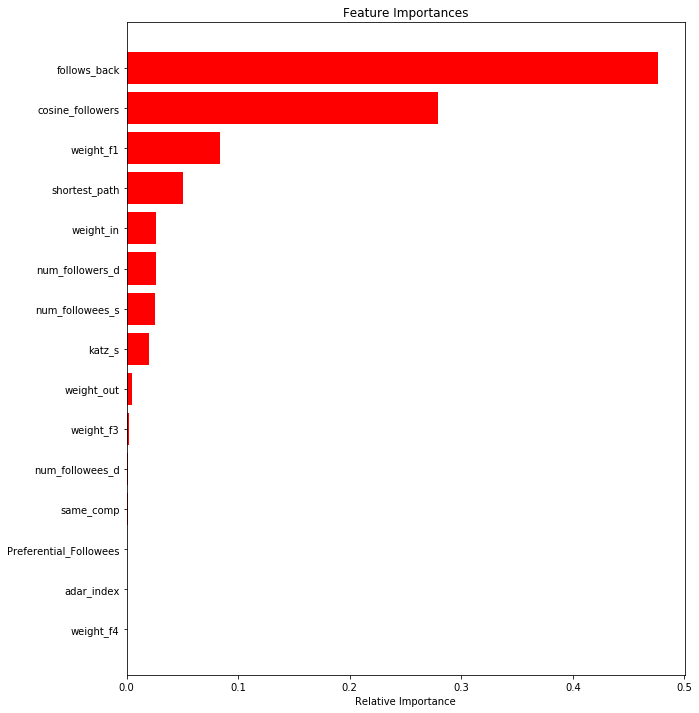

In [97]:
features = df_final_train.columns
importances = best_model.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## SVM with RBF kernel

In [100]:
from sklearn.svm import SVC

class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False,
                      tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                      max_iter=-1, decision_function_shape=’ovr’, random_state=None)

In [104]:
clf = SVC(kernel = 'rbf' , random_state= 42,verbose= True)
params = {'C' : [0.0001,0.001,0.01,0.1,1,10,100] , 'gamma' : [0.0001,0.001,0.01,0.1,1,10,100] }

model_svm = GridSearchCV(clf , params , n_jobs=-1 , cv=4,return_train_score = True)

model_svm.fit(df_final_train,y_train)

print('mean test scores',model_svm.cv_results_['mean_test_score'])
print('mean train scores',model_svm.cv_results_['mean_train_score'])

[LibSVM]mean test scores [0.7599948  0.78870423 0.7752445  0.50004    0.50004    0.50004
 0.50004    0.78341433 0.79552409 0.77551449 0.66228675 0.50004
 0.50004    0.50004    0.80263395 0.83147337 0.83910322 0.78030439
 0.60607788 0.56296874 0.56296874 0.83959321 0.88293234 0.90648187
 0.86278274 0.73967521 0.67585648 0.67560649 0.90393192 0.93844123
 0.93934121 0.91282174 0.85459291 0.82707346 0.82678346 0.93099138
 0.95284094 0.94705106 0.91900162 0.86679266 0.82741345 0.82686346
 0.95366093 0.95863083 0.94551109 0.91616168 0.86682266 0.82741345
 0.82686346]
mean train scores [0.7599948  0.7885309  0.77526783 0.50004    0.50004    0.50004
 0.50004    0.78348433 0.79572076 0.77550449 0.66231009 0.50004
 0.50004    0.50004    0.80276394 0.83152004 0.83963654 0.78094438
 0.60695454 0.56340207 0.56340207 0.83968987 0.88359232 0.90874516
 0.86726599 0.74657507 0.68330968 0.68307968 0.90444858 0.94179449
 0.95947414 0.98237369 0.99574675 0.99647007 0.9965434  0.93293134
 0.96407405 0.9830

In [105]:
model_svm.cv_results_

{'mean_fit_time': array([ 2110.62114894,  2204.60313493,  2223.04148972,  2321.48170215,
         2220.9974218 ,  2293.18452173,  2290.87180316,  2001.18543249,
         2689.87503314,  3293.95593286,  2112.78452843,  2212.10859245,
        43226.61962086,  2255.64609921,  1614.76106274,  9666.57635629,
         4997.63994294,  3838.36714351,  2820.9260233 ,  2205.21729469,
         2183.81006092,  1234.89758593,  1646.77400041,  2876.22373825,
         4844.59364074,  5389.83398575,  6836.30381131,  5617.93064189,
          990.41675377,  1217.67339146,  2442.26780242, 33923.14808863,
        21187.28533626,  8161.0104059 ,  7760.45591408,   879.11903691,
         1360.10938293,  3734.22526687,  6353.18504345,  8738.64709777,
        11404.53336239, 10993.23987871,   884.90421051,  2011.16159511,
         4728.78552496,  6758.8319357 ,  8772.56182188, 10932.4342646 ,
        10016.12987554]),
 'std_fit_time': array([1.56430070e+01, 1.64573587e+01, 2.48548542e+01, 1.80184118e+01,
     

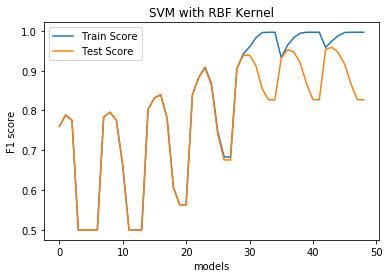

In [107]:
plt.plot(model_svm.cv_results_['mean_train_score'],label='Train Score')
plt.plot(model_svm.cv_results_['mean_test_score'],label='Test Score')
plt.xlabel("models")
plt.ylabel('F1 score')
plt.title('SVM with RBF Kernel')
plt.legend()

In [138]:
for_heat_map=pd.DataFrame()
for_heat_map['C'] = model_svm.cv_results_['mean_train_score'][]
for_heat_map['gamma'] = model_svm.cv_results_['mean_test_score']

In [194]:
for_heat_train = pd.DataFrame()
for_heat_test = pd.DataFrame()
start = 0
for i in params.get('C'):
    for_heat_train[i]= model_svm.cv_results_['mean_train_score'][start:start+7]
    for_heat_test[i]= model_svm.cv_results_['mean_test_score'][start:start+7]
    if start < 49:
        start = start+7

In [195]:
for_heat_train.set_index(pd.Index([0.0001, 0.001, 0.01, 0.1, 1, 10, 100]))
for_heat_test.set_index(pd.Index([0.0001, 0.001, 0.01, 0.1, 1, 10, 100]))

,0.0001,0.001,0.01,0.1,1.0,10.0,100.0
0.0001,0.759995,0.783414,0.802634,0.839593,0.903932,0.930991,0.953661
0.0010,0.788704,0.795524,0.831473,0.882932,0.938441,0.952841,0.958631
0.0100,0.775244,0.775514,0.839103,0.906482,0.939341,0.947051,0.945511
0.1000,0.500040,0.662287,0.780304,0.862783,0.912822,0.919002,0.916162
1.0000,0.500040,0.500040,0.606078,0.739675,0.854593,0.866793,0.866823
10.0000,0.500040,0.500040,0.562969,0.675856,0.827073,0.827413,0.827413
100.0000,0.500040,0.500040,0.562969,0.675606,0.826783,0.826863,0.826863


Text(33.0, 0.5, 'Gamma hyper paramater')

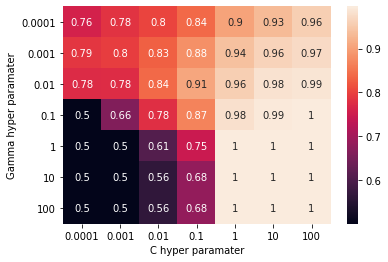

In [196]:
sns.heatmap(for_heat_train, xticklabels=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], yticklabels=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], annot=True)
plt.xlabel("C hyper paramater")
plt.ylabel("Gamma hyper paramater")

Text(33.0, 0.5, 'Gamma hyper paramater')

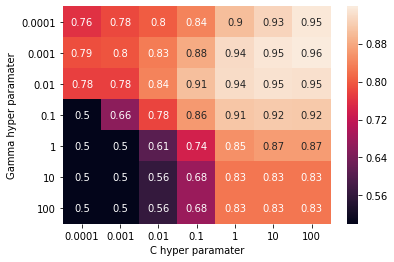

In [197]:
sns.heatmap(for_heat_test, xticklabels=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], yticklabels=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], annot=True)
plt.xlabel("C hyper paramater")
plt.ylabel("Gamma hyper paramater")

In [185]:
model_svm.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [186]:
best_model = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [187]:
best_model.fit(df_final_train,y_train)
y_train_pred = best_model.predict(df_final_train)
y_test_pred = best_model.predict(df_final_test)

[LibSVM]

In [188]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9751286101997002
Test f1 score 0.8750982961992135


In [189]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


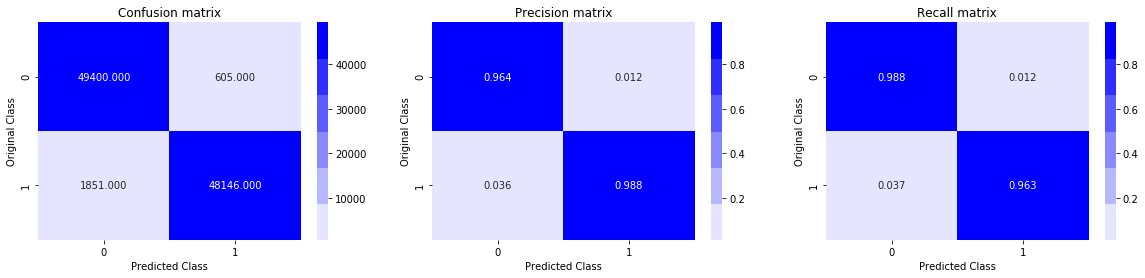

Test confusion_matrix


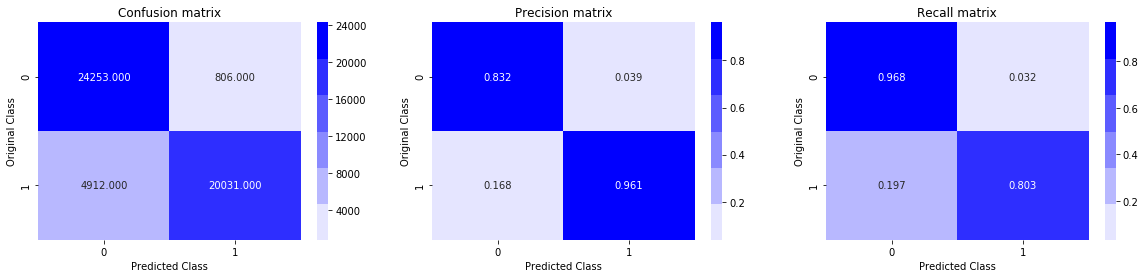

In [190]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

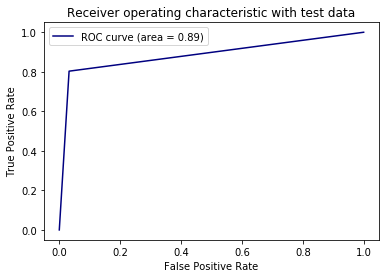

In [191]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

<h1>Result's</h1>

<h2>Without added featurs</h2>

In [6]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Max_depth","Estimator","F1 Train Score","F2 Test Score"]
x.add_row(["Random Forest",20,250,0.9623,0.9252])
x.add_row(["Random Forest with random search",14,121,0.9658,0.9241 ])

print(x)

+----------------------------------+-----------+-----------+----------------+---------------+
|              Model               | Max_depth | Estimator | F1 Train Score | F2 Test Score |
+----------------------------------+-----------+-----------+----------------+---------------+
|          Random Forest           |     11    |    115    |     0.9623     |     0.9252    |
| Random Forest with random search |     14    |    121    |     0.9658     |     0.9241    |
+----------------------------------+-----------+-----------+----------------+---------------+


<h2>With added featurs</h2>

In [98]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Hyper Paramater 1","Hyper Paramater 2","F1 Train Score","F2 Test Score",'AUC']
x.add_row(["Random Forest",'Max_depth - 11','Estimator - 115',0.9647,0.9264 ,0.93])
x.add_row(["Random Forest with random search",'Max_depth - 14','Estimator - 121',0.9649,0.9265 , 0.93])
x.add_row(["XGBOOST",'Max_depth - 2','Estimator - 100',0.9752,0.8765,0.89 ])
x.add_row(["SVM using RBF Kernal",'C - 100','Gamma - 0.001',0.9751,0.8756,0.89 ])
print (x)

+----------------------------------+-------------------+-------------------+----------------+---------------+------+
|              Model               | Hyper Paramater 1 | Hyper Paramater 2 | F1 Train Score | F2 Test Score | AUC  |
+----------------------------------+-------------------+-------------------+----------------+---------------+------+
|          Random Forest           |   Max_depth - 11  |  Estimator - 115  |     0.9647     |     0.9264    | 0.93 |
| Random Forest with random search |   Max_depth - 14  |  Estimator - 121  |     0.9649     |     0.9265    | 0.93 |
|             XGBOOST              |   Max_depth - 2   |  Estimator - 100  |     0.9752     |     0.8765    | 0.89 |
|       SVM using RBF Kernal       |      C - 100      |   Gamma - 0.001   |     0.9751     |     0.8756    | 0.89 |
+----------------------------------+-------------------+-------------------+----------------+---------------+------+


# Conclusion

when we see the important featuers after adding Preferential Attachment and SVD dot Features.we can find Preferential in and Preferential out playes an important role in predicting the connections between nodes. Over Non linear models Random forest performs better than SVM with RBF kernal and XGBOOST, same way F1 score and AUC is high for Random Forest model and the model does not overfit as difference between train and test data are not high for Random Forest.So we Random Farest model can be deployed for Facebook Friend recommendation System.